# Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

###Datasets

In [ ]:
import pandas as pd
import requests
import io
# First URL
URL1 = "/content/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Second URL
URL2 = '/content/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   Block                                90 non-null     float64
 4   ReusedCount                          90 non-null     float64
 5   Orbit_ES-L1                          90 non-null     float64
 6   Orbit_GEO                            90 non-null     float64
 7   Orbit_GTO                            90 non-null     float64
 8   Orbit_HEO                            90 non-null     float64
 9   Orbit_ISS                            90 non-null     float64
 10  Orbit_LEO                            90 non-null     float64
 11  Orbit_MEO                         

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


###Limpieza de los datasets

In [ ]:
# Asegúrate de que la columna 'Class' existe en el DataFrame
if 'Class' in data.columns:
    # Extraer la columna 'Class' y convertirla a un array de NumPy
    Y = data['Class'].to_numpy()

    # Verificar el tipo de Y y el contenido
    print(type(Y))  # Debe ser <class 'numpy.ndarray'>
    print(Y)        # Mostrar los primeros elementos del array
else:
    print("La columna 'Class' no se encuentra en el DataFrame.")

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Verificar que Y es un array de NumPy
print(type(Y))  # Debería ser <class 'numpy.ndarray'>

# Agregar la columna 'Class' al DataFrame X
X['Class'] = Y

# Verificar el DataFrame combinado
print(X.head())


<class 'numpy.ndarray'>
   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1059  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  Reused_False  \
0           0.0           0.0             1.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   Block                                90 non-null     float64
 4   ReusedCount                          90 non-null     float64
 5   Orbit_ES-L1                          90 non-null     float64
 6   Orbit_GEO                            90 non-null     float64
 7   Orbit_GTO                            90 non-null     float64
 8   Orbit_HEO                            90 non-null     float64
 9   Orbit_ISS                            90 non-null     float64
 10  Orbit_LEO                            90 non-null     float64
 11  Orbit_MEO                         

##Seleccion de Variables

Top 10 características más correlacionadas con 'Class':
Class                                  1.000000
Legs_True                              0.673825
GridFins_True                          0.642540
ReusedCount                            0.466584
Block                                  0.416015
FlightNumber                           0.401923
LandingPad_5e9e3032383ecb6bb234e7ca    0.322329
LandingPad_5e9e3032383ecb267a34e7c7    0.223495
LandingPad_5e9e3033383ecbb9e534e7cc    0.208013
Reused_True                            0.207582
PayloadMass                            0.199992
Name: Class, dtype: float64


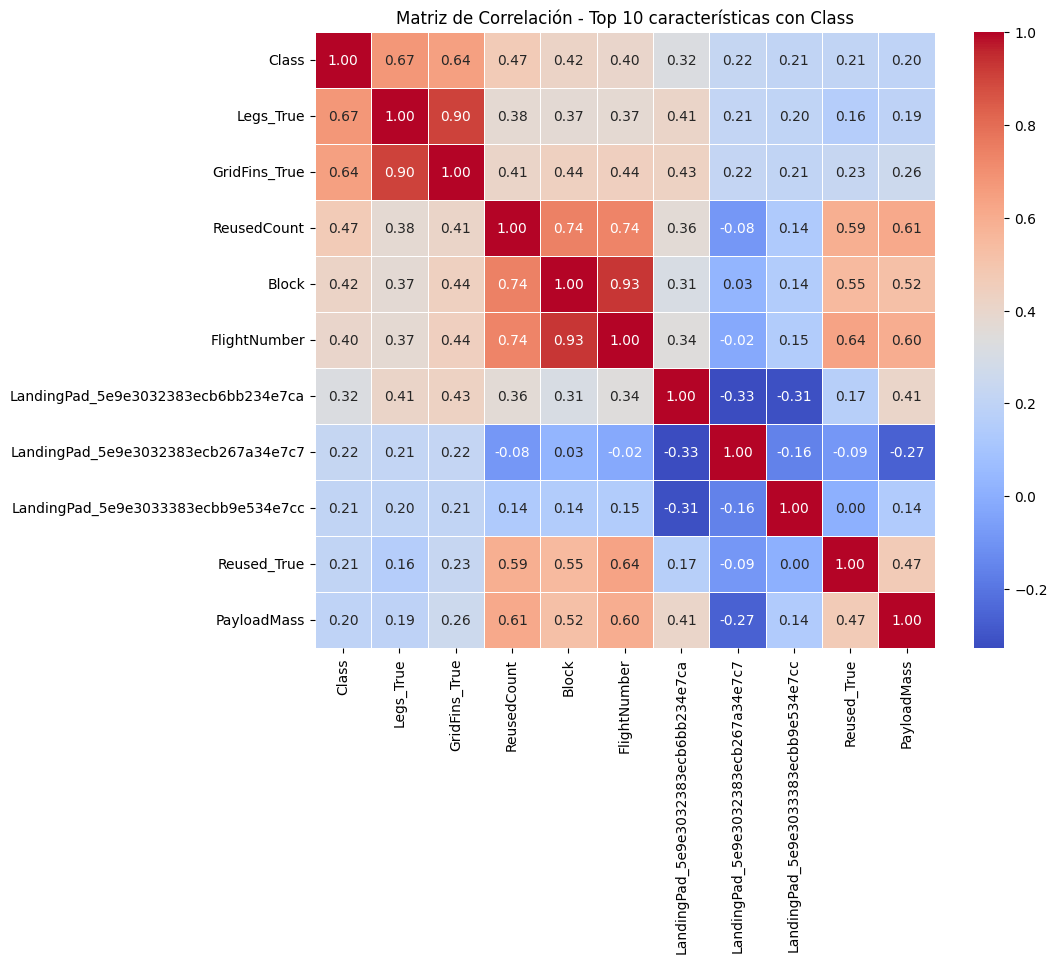

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'X' sea un DataFrame y 'Y' sea la variable objetivo
# Agregar 'Class' (la variable objetivo) a 'X'
X['Class'] = Y  # Suponiendo que 'Y' contiene la columna objetivo 'Class'

# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Mostrar las 10 características más correlacionadas con 'Class'
top_10_features = correlation_matrix['Class'].sort_values(ascending=False).head(11)  # Incluye 'Class' mismo
print("Top 10 características más correlacionadas con 'Class':")
print(top_10_features)

# Filtrar las 10 variables más correlacionadas, excluyendo 'Class' si es necesario
top_10_features_corr = correlation_matrix.loc[top_10_features.index, top_10_features.index]

# Visualizar la matriz de correlación para estas variables
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_features_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - Top 10 características con Class')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
X_selected = X[['Legs_False', 'ReusedCount', 'GridFins_True', 'GridFins_False', 'PayloadMass', 'Legs_True']]

# 2. Estandarizar los datos
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

# 3. Variable objetivo
Y = data['Class']
# Verificar el cambio
print(X_standardized[:5])  # Mostrar las primeras filas del array estandarizado

[[ 1.93309133e+00 -9.73440458e-01 -1.87082869e+00  1.87082869e+00
  -1.94814463e-16 -1.93309133e+00]
 [ 1.93309133e+00 -9.73440458e-01 -1.87082869e+00  1.87082869e+00
  -1.19523159e+00 -1.93309133e+00]
 [ 1.93309133e+00 -9.73440458e-01 -1.87082869e+00  1.87082869e+00
  -1.16267307e+00 -1.93309133e+00]
 [ 1.93309133e+00 -9.73440458e-01 -1.87082869e+00  1.87082869e+00
  -1.20058661e+00 -1.93309133e+00]
 [ 1.93309133e+00 -9.73440458e-01 -1.87082869e+00  1.87082869e+00
  -6.28670558e-01 -1.93309133e+00]]


### Particion de los datos

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X_standardized,  # Datos de características
    Y,  # Etiquetas
    test_size=0.2,  # Tamaño del conjunto de prueba (20% de los datos)
    random_state=2  # Semilla para reproducibilidad
)

# Verificar las dimensiones de los conjuntos resultantes
print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (72, 6)
X_test: (18, 6)
Y_train: (72,)
Y_test: (18,)


In [ ]:
Y_test.shape

(18,)

### Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear el objeto de regresión logística
logreg = LogisticRegression()

# Definir los parámetros para la búsqueda en cuadrícula
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Crear el objeto GridSearchCV con validación cruzada de 10 pliegues
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10)

# Ajustar GridSearchCV a los datos de entrenamiento
logreg_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(logreg_cv.best_params_)

# Mostrar la mejor puntuación obtenida
print("Mejor puntuación obtenida:")
print(logreg_cv.best_score_)

Mejores parámetros encontrados:
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor puntuación obtenida:
0.875


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.875


In [ ]:
# Calcular la precisión (accuracy) en los datos de prueba
test_accuracy = logreg_cv.score(X_test, Y_test)

# Mostrar la precisión en los datos de prueba
print("Precisión en los datos de prueba:")
print(test_accuracy)

Precisión en los datos de prueba:
0.8333333333333334


##Matriz de confusion (Regresion Logistica)

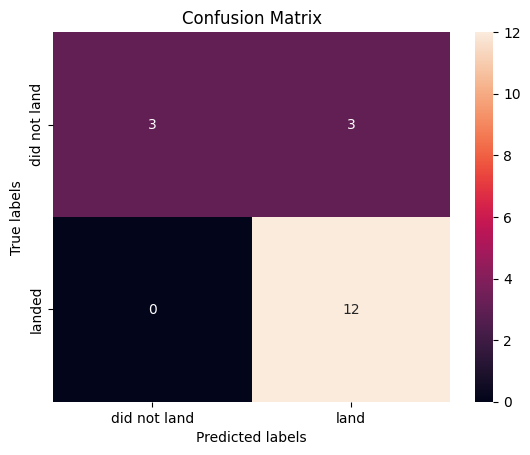

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### SVM

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir los parámetros para la búsqueda aleatoria
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': np.logspace(-1, 1, 3),   # 3 valores posibles
    'gamma': np.logspace(-1, 1, 3)  # 3 valores posibles
}

# Crear el objeto SVM
svm = SVC()

# Crear el objeto RandomizedSearchCV con validación cruzada de 5 pliegues
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=parameters, n_iter=10, cv=5, n_jobs=-1)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
svm_random.fit(X_train, Y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(svm_random.best_params_)

# Mostrar la mejor puntuación obtenida
print("Mejor puntuación obtenida:")
print(svm_random.best_score_)


Mejores parámetros encontrados:
{'kernel': 'linear', 'gamma': 0.09999999999999999, 'C': 1.0}
Mejor puntuación obtenida:
0.8609523809523809


In [ ]:
print("Tuned hyperparameters (best parameters):", svm_random.best_params_)
print("Best score:", svm_random.best_score_)

Tuned hyperparameters (best parameters): {'kernel': 'linear', 'gamma': 0.09999999999999999, 'C': 1.0}
Best score: 0.8609523809523809


In [ ]:
# Calcular la precisión (accuracy) en los datos de prueba con el modelo SVM ajustado
test_accuracy_svm = svm_random.score(X_test, Y_test)

# Mostrar la precisión en los datos de prueba
print("Precisión en los datos de prueba con SVM:")
print(test_accuracy_svm)

Precisión en los datos de prueba con SVM:
0.8333333333333334


##Matriz de Confusion (SVM)

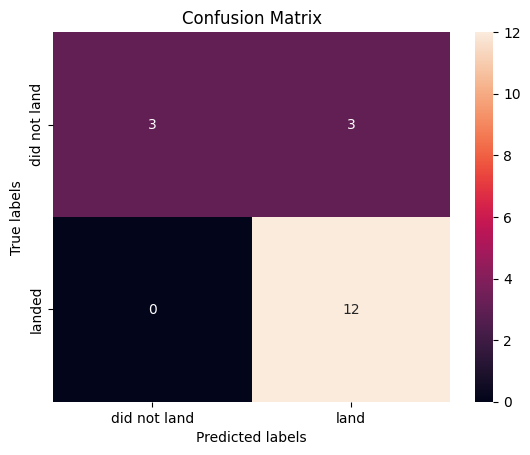

In [ ]:
yhat=svm_random.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

##Arbol de Decisiones

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Crear el objeto de clasificador de árbol de decisión
tree = DecisionTreeClassifier()

# Definir los parámetros para GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Crear el objeto GridSearchCV con 10 fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros para el modelo de árbol de decisión:")
print(tree_cv.best_params_)

Mejores parámetros para el modelo de árbol de decisión:
{'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9000000000000001


In [ ]:
# Calcular la precisión del modelo de árbol de decisión en los datos de prueba
tree_cv_accuracy = tree_cv.score(X_test, Y_test)

# Imprimir la precisión
print("Precisión del modelo de árbol de decisión en los datos de prueba:")
print(tree_cv_accuracy)

Precisión del modelo de árbol de decisión en los datos de prueba:
0.8888888888888888


##Matriz de Confusion (Arbol de decisiones)

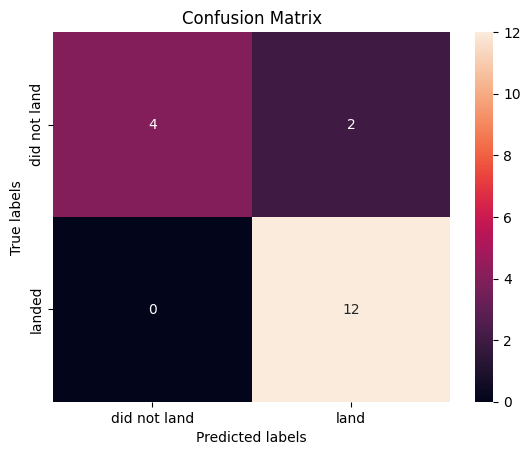

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

##KNN

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
# Parámetros para GridSearchCV
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Crear el objeto KNeighborsClassifier
KNN = KNeighborsClassifier()

# Crear el objeto GridSearchCV con 10 pliegues de validación cruzada
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(knn_cv.best_params_)

Mejores parámetros encontrados:
{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
accuracy : 0.8607142857142855


In [ ]:
# Calcular la precisión del modelo en los datos de prueba
accuracy_knn = knn_cv.score(X_test, Y_test)

# Imprimir la precisión
print(f'Precisión del modelo KNN en los datos de prueba: {accuracy_knn:.4f}')

Precisión del modelo KNN en los datos de prueba: 0.7778


##Matriz de confusión (KNN)

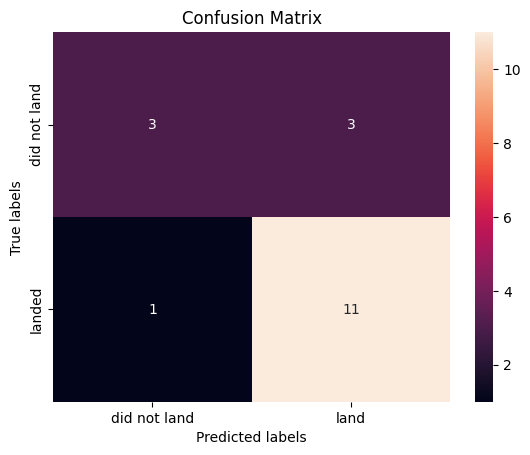

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
# Calcular la precisión de cada modelo en los datos de prueba
accuracy_logreg = logreg_cv.score(X_test, Y_test)
accuracy_svm = svm_random.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Imprimir las precisiones
print(f'Precisión del modelo de Regresión Logística: {accuracy_logreg:.4f}')
print(f'Precisión del modelo de SVM: {accuracy_svm:.4f}')
print(f'Precisión del modelo de Árbol de Decisión: {accuracy_tree:.4f}')
print(f'Precisión del modelo de KNN: {accuracy_knn:.4f}')

print("Mejores parámetros para Regresión Logística:", logreg_cv.best_params_)
print("Mejores parámetros para SVM:", svm_random.best_params_)
print("Mejores parámetros para Árbol de Decisión:", tree_cv.best_params_)
print("Mejores parámetros para KNN:", knn_cv.best_params_)

Precisión del modelo de Regresión Logística: 0.8333
Precisión del modelo de SVM: 0.8333
Precisión del modelo de Árbol de Decisión: 0.8889
Precisión del modelo de KNN: 0.7778
Mejores parámetros para Regresión Logística: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejores parámetros para SVM: {'kernel': 'linear', 'gamma': 0.09999999999999999, 'C': 1.0}
Mejores parámetros para Árbol de Decisión: {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Mejores parámetros para KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}


##Comparacion Final de los modelos

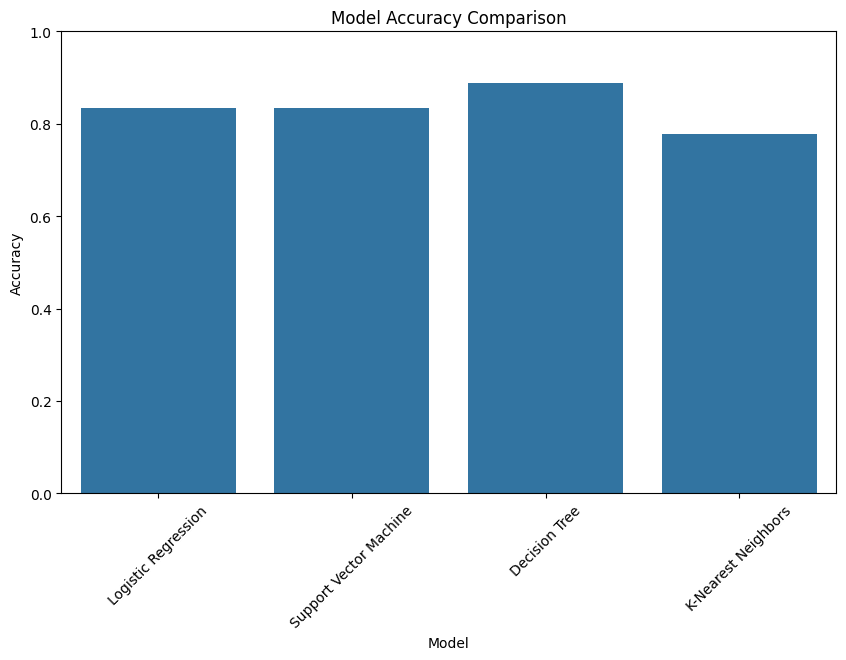

In [ ]:
# Variables con las precisiones de los modelos
accuracy_logreg = logreg_cv.score(X_test, Y_test)
accuracy_svm = svm_random.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_knn = knn_cv.score(X_test, Y_test)

# Crear un DataFrame con los nombres de los modelos y sus precisiones
model_accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_logreg, accuracy_svm, accuracy_tree, accuracy_knn]
})

# Generar un gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Asegurar que el eje y va de 0 a 1
plt.xticks(rotation=45)
plt.show()